In [47]:
%run LoserAnalysis.ipynb

# Plot x for fixed y & z

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
TIME_LIM = 60  # seconds

In [50]:
def varyX(minX, maxX, y, z, timeLimit=60):
    xs = range(minX, maxX+1)
    probs = {}
    
    for x in xs:
        state = (x,y,z)
        # Set up signal handler for SIGALRM, saving previous value
        oldHandler = signal.signal(signal.SIGALRM, sigalarmHandler)
        # Start timer
        signal.alarm(TIME_LIM)
        try:
            probs[x] = LoserAnalysis(state).getHittingProb()
        except TimeoutException:
            print(f'Took too long to find the hitting prob for state {state}')
        except RecursionError:
            print(f'maximum recursion depth exceeded for state {state}')
        finally:
            # Turn off timer
            signal.alarm(0)
            # Restore handler to previous value
            signal.signal(signal.SIGALRM, oldHandler)
        
    # use numerical approximation for the unrecorded states
    missedStates = [(x,y,z) for x in xs if x not in probs]
    numericalProbs = {s[0]:LoserAnalysis(s).getHittingProbNumerical() for s in missedStates}
    
    return probs, numericalProbs

In [61]:
# Automate the process
def plotXforFixedYZ(minX, maxX, y, z, probFunction=varyX, t=30):
    """
    Plots x values within the range [`minX`, `maxX`] (inclusive) for fixed y and z.
    The `timeLimit` (in seconds) casts a limit on the computation time of the hitting prob for each state.
    Saves the plot to a file provided by the string `figName`.
    """
    exactProbs, numericalProbs = probFunction(minX, maxX, y, z, t)
    
    # plot
    plt.scatter([x for x in exactProbs.keys()], exactProbs.values(), 
            color='b', label='exact probs', s=2)
    plt.scatter([x for x in numericalProbs.keys()], numericalProbs.values(), 
                color='r', label='numerical probs', s=2)

    # add graph features
    plt.xlabel('x')
    plt.ylabel('P(loser = Player 1)')
    plt.title(f"Hitting probabilities for different x values (y = {y}, z = {z})")
    plt.legend()

    plt.savefig(f'Hitting probs for different x (y = {y}, z = {z}) - {str(probFunction)}, game1.png')
    plt.show()

maximum recursion depth exceeded for state (1, 100, 200)
maximum recursion depth exceeded for state (2, 100, 200)
maximum recursion depth exceeded for state (3, 100, 200)
Took too long to find the hitting prob for state (4, 100, 200)
Took too long to find the hitting prob for state (5, 100, 200)
maximum recursion depth exceeded for state (6, 100, 200)
maximum recursion depth exceeded for state (7, 100, 200)
Took too long to find the hitting prob for state (8, 100, 200)
maximum recursion depth exceeded for state (9, 100, 200)
maximum recursion depth exceeded for state (11, 100, 200)
Took too long to find the hitting prob for state (12, 100, 200)
maximum recursion depth exceeded for state (13, 100, 200)
maximum recursion depth exceeded for state (14, 100, 200)
Took too long to find the hitting prob for state (15, 100, 200)
Took too long to find the hitting prob for state (16, 100, 200)
maximum recursion depth exceeded for state (17, 100, 200)
maximum recursion depth exceeded for state (1

maximum recursion depth exceeded for state (154, 100, 200)
Took too long to find the hitting prob for state (155, 100, 200)
Took too long to find the hitting prob for state (156, 100, 200)
maximum recursion depth exceeded for state (157, 100, 200)
maximum recursion depth exceeded for state (158, 100, 200)
maximum recursion depth exceeded for state (159, 100, 200)
maximum recursion depth exceeded for state (161, 100, 200)
Took too long to find the hitting prob for state (162, 100, 200)
maximum recursion depth exceeded for state (163, 100, 200)
maximum recursion depth exceeded for state (164, 100, 200)
Took too long to find the hitting prob for state (165, 100, 200)
maximum recursion depth exceeded for state (166, 100, 200)
maximum recursion depth exceeded for state (167, 100, 200)
Took too long to find the hitting prob for state (168, 100, 200)
maximum recursion depth exceeded for state (169, 100, 200)
maximum recursion depth exceeded for state (171, 100, 200)
maximum recursion depth ex

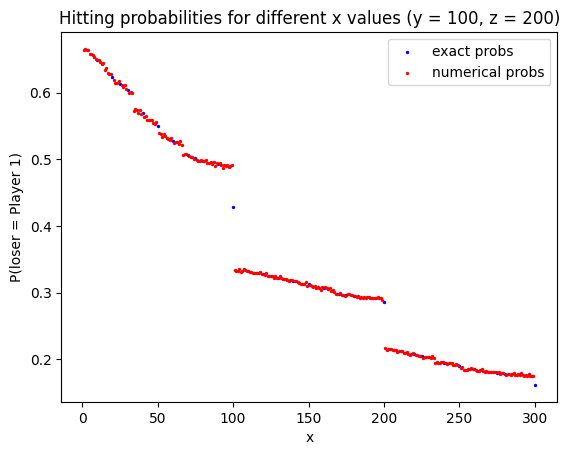

In [38]:
plotXforFixedYZ(1, 300, 100, 200, t=30)

In [32]:
class TimeoutException(Exception):
    """
    Custom exception for timeout.
    """
    pass

def sigalarmHandler(signum, frame):
    """
    Handler function to be called when SIGALRM is received.
    """
    # We get signal!
    raise TimeoutException()

Took too long to find the hitting prob for state (9, 20, 20)
Took too long to find the hitting prob for state (11, 20, 20)
Took too long to find the hitting prob for state (13, 20, 20)
Took too long to find the hitting prob for state (17, 20, 20)
Took too long to find the hitting prob for state (19, 20, 20)
Took too long to find the hitting prob for state (21, 20, 20)
Took too long to find the hitting prob for state (23, 20, 20)
Took too long to find the hitting prob for state (27, 20, 20)
Took too long to find the hitting prob for state (29, 20, 20)
Took too long to find the hitting prob for state (31, 20, 20)
Took too long to find the hitting prob for state (33, 20, 20)
Took too long to find the hitting prob for state (37, 20, 20)
Took too long to find the hitting prob for state (39, 20, 20)
Took too long to find the hitting prob for state (41, 20, 20)
Took too long to find the hitting prob for state (43, 20, 20)
Took too long to find the hitting prob for state (47, 20, 20)
Took too 

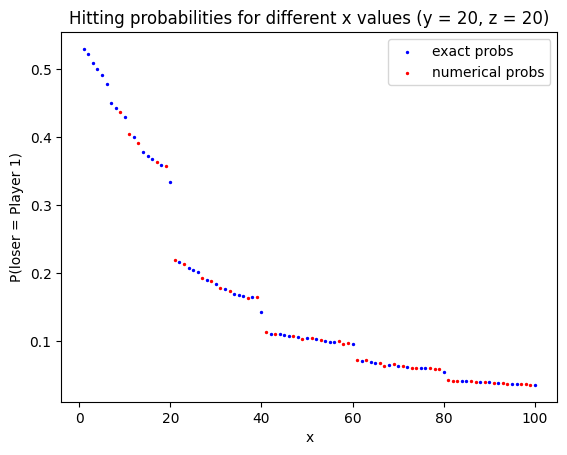

In [43]:
plotXforFixedYZ(1, 100, 20, 20, t=30)

## Adapted code using memoization

Adapt fixed sum code to vary x for fixed y & z.

In [57]:
%run TwoPlayer_Memoisation.ipynb

In [58]:
def varyX_memoized(minX, maxX, y, z, t=10):
    return {}, {x:Q(x,y,z,t) for x in range(minX, maxX+1)} # no exact probs - just to comply with the return values of varyX

In [59]:
varyX_memoized(1, 20, 20, 20)

({},
 {1: 0.5292680655049197,
  2: 0.521353326527545,
  3: 0.5092737466976579,
  4: 0.5004434876119833,
  5: 0.49122878218725124,
  6: 0.47808047262654746,
  7: 0.4498510373799726,
  8: 0.4425199304814645,
  9: 0.43678178027993697,
  10: 0.4285657819670951,
  11: 0.4043071286664465,
  12: 0.39910167297498683,
  13: 0.39254663632110615,
  14: 0.3769258700930583,
  15: 0.3725328686239395,
  16: 0.3678566675028366,
  17: 0.36322505329260446,
  18: 0.3591694636022625,
  19: 0.3567542951616454,
  20: 0.3333333333333333})

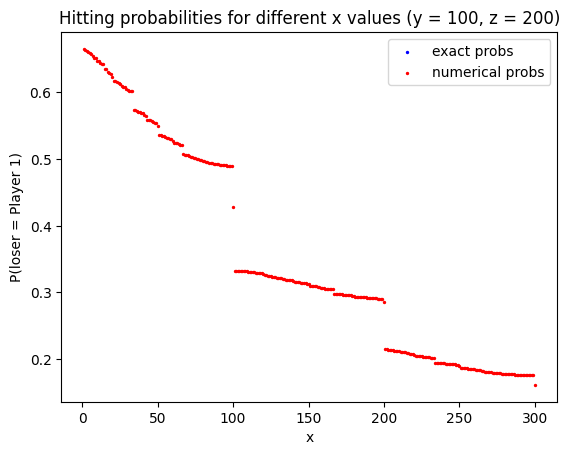

In [62]:
plotXforFixedYZ(1, 300, 100, 200, probFunction=varyX_memoized, t=10)

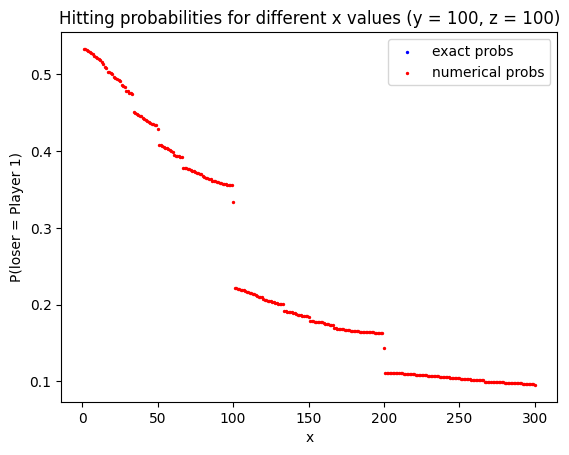

In [63]:
plotXforFixedYZ(1, 300, 100, 100, probFunction=varyX_memoized, t=10)

# Game 2

In [64]:
%run Game2.ipynb
%run ThreePlayer_Memoisation.ipynb

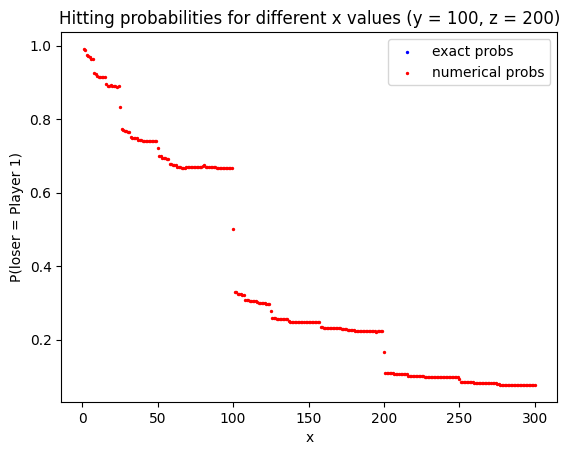

In [65]:
plotXforFixedYZ(1, 300, 100, 200, probFunction=varyX_memoized, t=10)

In [ ]:
plotXforFixedYZ(1, 1000, 100, 200, probFunction=varyX_memoized, t=10)